In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import os


In [3]:
real_path =  './fastStorage/2013-8/'
output_path = './output/'
data_path = './data/'
mdata_path = './mdata/'
mdata_4_path = 'mdata_4/'

In [4]:
def read_csv_file_orginal(filename):
    data = pd.read_csv(real_path + str(filename) + '.csv', sep=";\t" , engine='python')
    # data = data.replace(';', '', regex=True)
    data = data.astype(float)

    data['Memory usage [%]']  = data.apply(lambda x: 0 if x['Memory capacity provisioned [KB]'] == 0 else 100*x['Memory usage [KB]'] /x['Memory capacity provisioned [KB]'] , axis=1) 
        
    data = data.drop(data.columns[[0, 1 , 2 ,3 , 5 , 6]], axis=1)
    
    data = data[['CPU usage [%]', 'Memory usage [%]', 'Disk read throughput [KB/s]' , 'Disk write throughput [KB/s]' , 'Network received throughput [KB/s]' , 'Network transmitted throughput [KB/s]']]
    # print(type(data))
    return data

 

In [5]:
def save_modified_csv(df, filename):
    if not os.path.exists(output_path):
        os.makedirs(output_path)
        
    df.to_csv(output_path + str(filename) + '.csv', sep=";", index=False)


In [6]:
df = read_csv_file_orginal(1)
df.head()


,CPU usage [%],Memory usage [%],Disk read throughput [KB/s],Disk write throughput [KB/s],Network received throughput [KB/s],Network transmitted throughput [KB/s]
0,93.233333,9.133331,0.133333,15981.600000,0.000000,2.133333
1,93.050000,10.066664,1.333333,19137.333333,0.000000,2.600000
2,89.150000,13.333330,2.533333,19974.933333,535.666667,23.933333
3,90.050000,27.999996,5.466667,8791.800000,349.666667,5.466667
4,93.566667,13.866664,5.400000,15679.533333,0.000000,2.066667


In [7]:
# for i in range(1 , 1251):
#     df = read_csv_file_orginal(i)
#     save_modified_csv(df, i)


In [8]:
def read_csv_file_modified(filename):
    data = pd.read_csv(output_path + str(filename) + '.csv', sep=";" , engine='python')
    data = data.astype(float)
    
    return data


In [9]:
df = read_csv_file_modified(1050)
df.head()

,CPU usage [%],Memory usage [%],Disk read throughput [KB/s],Disk write throughput [KB/s],Network received throughput [KB/s],Network transmitted throughput [KB/s]
0,0.933333,25.366648,0.0,0.133333,1.400000,1.4
1,0.800000,26.303797,0.0,0.200000,0.200000,0.2
2,0.933333,28.646567,0.0,0.333333,0.866667,0.8
3,1.066667,29.047634,0.0,0.133333,0.200000,0.2
4,0.800000,25.233062,0.0,0.266667,0.200000,0.2


In [10]:
def create_data_file(df , filename):
    groups = [df.iloc[i:i+13] for i in range(0, len(df), 1)]

    result_df = pd.DataFrame([group.values.flatten() for group in groups])

    # num_rows = len(result_df)
    # num_columns = len(result_df.columns)

    # new_columns = ['CPU_usage', 'Memory_usage', 'Disk_read' , 'Disk_write' , 'Network_received' , 'Network_transmitted']
    # column_names = [f'{col}{i}' for i in range(0,12) for col in new_columns]

    # # result_df.columns = column_names

    return result_df



In [11]:
def save_data_csv(df, filename):
    if not os.path.exists(data_path):
        os.makedirs(data_path)
        
    df.to_csv(data_path + str(filename) + '.csv', sep=";", index=False)


In [12]:
def save_4_data_csv(df, filename):
    if not os.path.exists(mdata_4_path):
        os.makedirs(mdata_4_path)
        
    df.to_csv(mdata_4_path + str(filename) + '.csv', sep=";", index=False)


In [14]:
df = read_csv_file_modified(1)
# drop column 3 and 4
df = df.drop(df.columns[[2, 3]], axis=1)
df.head()


,CPU usage [%],Memory usage [%],Network received throughput [KB/s],Network transmitted throughput [KB/s]
0,93.233333,9.133331,0.000000,2.133333
1,93.050000,10.066664,0.000000,2.600000
2,89.150000,13.333330,535.666667,23.933333
3,90.050000,27.999996,349.666667,5.466667
4,93.566667,13.866664,0.000000,2.066667


In [15]:
# for i in range(1 , 1251):
#     df = read_csv_file_modified(i)
#     df = df.drop(df.columns[[2, 3]], axis=1)
#     data = create_data_file(df, i)
#     save_4_data_csv(data, i)


In [16]:
def read_csv_file_data(filename):
    data = pd.read_csv(data_path + str(filename) + '.csv', sep=";" , engine='python')
    data = data.astype(float)

    new_columns = ['CPU_usage', 'Memory_usage', 'Disk_read' , 'Disk_write' , 'Network_received' , 'Network_transmitted']
    column_names = [f'{col}{i}' for i in range(0,12) for col in new_columns]

    data.columns = column_names
  
    
    return data


In [17]:
data = read_csv_file_data(1)
data.head()

,CPU_usage0,Memory_usage0,Disk_read0,Disk_write0,Network_received0,Network_transmitted0,CPU_usage1,Memory_usage1,Disk_read1,Disk_write1,...,Disk_read10,Disk_write10,Network_received10,Network_transmitted10,CPU_usage11,Memory_usage11,Disk_read11,Disk_write11,Network_received11,Network_transmitted11
0,93.233333,9.133331,0.133333,15981.600000,0.000000,2.133333,93.050000,10.066664,1.333333,19137.333333,...,0.000000,1.400000,0.000000,1.600000,55.416667,16.466666,2.533333,10.733333,719.933333,21.466667
1,93.050000,10.066664,1.333333,19137.333333,0.000000,2.600000,89.150000,13.333330,2.533333,19974.933333,...,2.533333,10.733333,719.933333,21.466667,0.733333,15.399997,0.000000,1.333333,0.000000,1.000000
2,89.150000,13.333330,2.533333,19974.933333,535.666667,23.933333,90.050000,27.999996,5.466667,8791.800000,...,0.000000,1.333333,0.000000,1.000000,0.600000,2.199998,0.000000,1.333333,0.000000,1.000000
3,90.050000,27.999996,5.466667,8791.800000,349.666667,5.466667,93.566667,13.866664,5.400000,15679.533333,...,0.000000,1.333333,0.000000,1.000000,0.650000,0.000000,0.000000,1.333333,0.000000,1.000000
4,93.566667,13.866664,5.400000,15679.533333,0.000000,2.066667,93.250000,9.466664,4.466667,15553.733333,...,0.000000,1.333333,0.000000,1.000000,0.583333,0.000000,0.000000,2.266667,0.000000,1.066667


In [18]:
def read_csv_file_mdata(filename):
    data = pd.read_csv(mdata_path + str(filename) + '.csv', sep=";" , engine='python')
    data = data.astype(float)
  
    
    return data


In [19]:
def read_csv_file_mdata_4(filename):
    data = pd.read_csv(mdata_4_path + str(filename) + '.csv', sep=";" , engine='python')
    data = data.astype(float)

    # new_columns = ['CPU_usage', 'Memory_usage', 'Network_received' , 'Network_transmitted']
    # column_names = [f'{col}{i}' for i in range(0,13) for col in new_columns]
    # data.columns = column_names
  
    
    return data


In [20]:
data = read_csv_file_mdata_4(1)
data.head()
# print(len(data.columns))

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,93.233333,9.133331,0.000000,2.133333,93.050000,10.066664,0.000000,2.600000,89.150000,13.333330,...,0.000000,1.600000,55.416667,16.466666,719.933333,21.466667,0.733333,15.399997,0.0,1.000000
1,93.050000,10.066664,0.000000,2.600000,89.150000,13.333330,535.666667,23.933333,90.050000,27.999996,...,719.933333,21.466667,0.733333,15.399997,0.000000,1.000000,0.600000,2.199998,0.0,1.000000
2,89.150000,13.333330,535.666667,23.933333,90.050000,27.999996,349.666667,5.466667,93.566667,13.866664,...,0.000000,1.000000,0.600000,2.199998,0.000000,1.000000,0.650000,0.000000,0.0,1.000000
3,90.050000,27.999996,349.666667,5.466667,93.566667,13.866664,0.000000,2.066667,93.250000,9.466664,...,0.000000,1.000000,0.650000,0.000000,0.000000,1.000000,0.583333,0.000000,0.0,1.066667
4,93.566667,13.866664,0.000000,2.066667,93.250000,9.466664,0.000000,2.066667,92.750000,9.133331,...,0.000000,1.000000,0.583333,0.000000,0.000000,1.066667,0.533333,0.000000,0.0,1.000000


In [22]:
g1_list =[] 
for i in range(1 ,1251):
    df = read_csv_file_modified(i)
    # print(df)
    mem_usage = df['Memory usage [%]']
    for j in mem_usage:
        if j > 200:
            g1_list.append(i)
            break
    

In [23]:
print(len(g1_list))

83


In [24]:
import random

g2_list = []

for i in range(10):
    while True:
        x = random.randint(1, 1251)
        if x not in g1_list:
            g2_list.append(x)
            break


In [25]:
# randomly select 50 nuber between 1 and 1250

import random

random_list = random.sample(range(1, 1251), 50)
random_list.sort()

random_list

[17,
 100,
 114,
 122,
 131,
 141,
 154,
 178,
 190,
 210,
 241,
 246,
 251,
 256,
 266,
 420,
 443,
 473,
 506,
 508,
 532,
 540,
 542,
 547,
 634,
 656,
 683,
 721,
 789,
 793,
 803,
 829,
 871,
 903,
 913,
 995,
 1019,
 1049,
 1052,
 1057,
 1062,
 1075,
 1103,
 1123,
 1151,
 1198,
 1199,
 1200,
 1218,
 1244]

In [26]:
g1_list_10 = random.sample(g1_list, 10)
g1_list_10.sort()

g1_list_10

[96, 110, 303, 309, 318, 587, 672, 691, 788, 924]

In [27]:
g2_list.sort()

g2_list

[12, 236, 442, 464, 549, 1093, 1122, 1197, 1208, 1249]

In [28]:
avg_cpu_usage = []
avg_memory_usage = []
for i in random_list:
    df = read_csv_file_orginal(i)
    avg_cpu_usage.append(df['CPU usage [%]'].mean())
    avg_memory_usage.append(df['Memory usage [%]'].mean())
    # concat all dataframes
    if i == random_list[0]:
        df_all = df
    else:
        df_all = pd.concat([df_all, df], ignore_index=True)




In [29]:
print(df_all.shape)

(459891, 6)


In [30]:
for i in random_list:

    df = read_csv_file_mdata(i).iloc[:-12, :]
    num_columns_in_df = 78
    
    if len(df.columns) != num_columns_in_df:
        continue
    
    new_columns = ['CPU_usage', 'Memory_usage', 'Disk_read' , 'Disk_write' , 'Network_received' , 'Network_transmitted']
    column_names = [f'{col}{i}' for i in range(0,13) for col in new_columns]
    df.columns = column_names
  

    if i == random_list[0]:
        train_data = df
    else:
        train_data = pd.concat([train_data, df], ignore_index=True)

In [31]:
print(train_data.shape)

(459291, 78)


In [32]:
for i in random_list:
    df = read_csv_file_mdata_4(i).iloc[:-12, :]
    num_columns_in_df = 52
    # concat all dataframes
    if len(df.columns) != num_columns_in_df:
        continue
    
    new_columns = ['CPU_usage', 'Memory_usage', 'Network_received' , 'Network_transmitted']
    column_names = [f'{col}{i}' for i in range(0,13) for col in new_columns]
    df.columns = column_names
  

    if i == random_list[0]:
        train_data_4 = df
    else:
        train_data_4 = pd.concat([train_data_4, df], ignore_index=True)

In [33]:
for i in g1_list_10:

    df = read_csv_file_mdata(i).iloc[:-12, :]

    num_columns_in_df = 78

    if len(df.columns) != num_columns_in_df:
        continue
    
    new_columns = ['CPU_usage', 'Memory_usage', 'Disk_read' , 'Disk_write' , 'Network_received' , 'Network_transmitted']
    column_names = [f'{col}{i}' for i in range(0,13) for col in new_columns]
    df.columns = column_names
    
    if i == g1_list_10[0]:
        g1_data_test = df
    else:
        g1_data_test = pd.concat([g1_data_test, df], ignore_index=True)




In [34]:
for i in g1_list_10:
    df = read_csv_file_mdata_4(i).iloc[:-12, :]

    num_columns_in_df = 52

    if len(df.columns) != num_columns_in_df:
        continue
    
    new_columns = ['CPU_usage', 'Memory_usage', 'Network_received' , 'Network_transmitted']
    column_names = [f'{col}{i}' for i in range(0,13) for col in new_columns]
    df.columns = column_names
    
    if i == g1_list_10[0]:
        g1_data_test_4 = df
    else:
        g1_data_test_4 = pd.concat([g1_data_test_4, df], ignore_index=True)




In [35]:
for i in g2_list:
    df = read_csv_file_mdata(i).iloc[:-12, :]

    num_columns_in_df = 78

    if len(df.columns) != num_columns_in_df:
        continue
    
    new_columns = ['CPU_usage', 'Memory_usage', 'Disk_read' , 'Disk_write' , 'Network_received' , 'Network_transmitted']
    column_names = [f'{col}{i}' for i in range(0,13) for col in new_columns]
    df.columns = column_names
    
    if i == g2_list[0]:
        g2_data_test = df
    else:
        g2_data_test = pd.concat([g2_data_test, df], ignore_index=True)




In [36]:
for i in g2_list:
    df = read_csv_file_mdata_4(i).iloc[:-12, :]

    num_columns_in_df = 52

    if len(df.columns) != num_columns_in_df:
        continue
    
    new_columns = ['CPU_usage', 'Memory_usage', 'Network_received' , 'Network_transmitted']
    column_names = [f'{col}{i}' for i in range(0,13) for col in new_columns]
    df.columns = column_names
    
    if i == g2_list[0]:
        g2_data_test_4 = df
    else:
        g2_data_test_4 = pd.concat([g2_data_test_4, df], ignore_index=True)




In [37]:
print(g1_data_test.shape)
print(g2_data_test.shape)

(52708, 78)
(84987, 78)


In [38]:
print(g1_data_test_4.shape)
print(g2_data_test_4.shape)

(52708, 52)
(84987, 52)


In [39]:
mean = df_all.mean(numeric_only=True)
std = df_all.std(numeric_only=True)

print("mean")
print(mean)
print("std")
print(std)
print("min")
min = df_all.min(numeric_only=True)
print(min)
print("max")
max = df_all.max(numeric_only=True)
print(max)


mean
CPU usage [%]                              9.171655
Memory usage [%]                           9.963124
Disk read throughput [KB/s]              190.886394
Disk write throughput [KB/s]              97.971426
Network received throughput [KB/s]        39.080852
Network transmitted throughput [KB/s]     36.973745
dtype: float64
std
CPU usage [%]                              25.344320
Memory usage [%]                           13.336180
Disk read throughput [KB/s]              4683.482279
Disk write throughput [KB/s]             2433.199870
Network received throughput [KB/s]        472.708296
Network transmitted throughput [KB/s]     740.588865
dtype: float64
min
CPU usage [%]                            0.0
Memory usage [%]                         0.0
Disk read throughput [KB/s]              0.0
Disk write throughput [KB/s]             0.0
Network received throughput [KB/s]       0.0
Network transmitted throughput [KB/s]    0.0
dtype: float64
max
CPU usage [%]                         

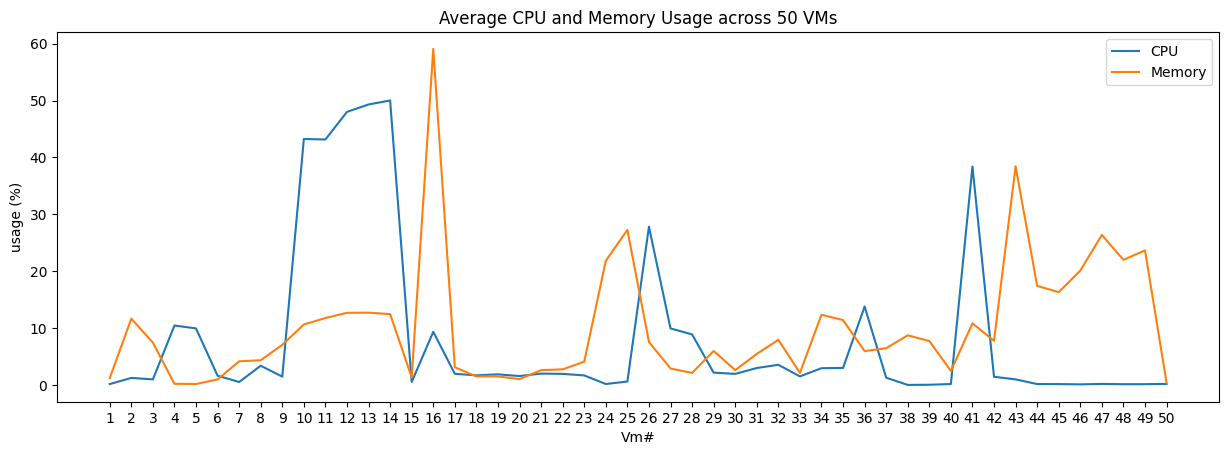

In [ ]:
plt.figure().set_figwidth(15)
plt.plot(avg_cpu_usage)
plt.plot(avg_memory_usage)
plt.title('Average CPU and Memory Usage across 50 VMs')
plt.ylabel('usage (%)')
plt.xlabel('Vm#')
plt.legend(['CPU', 'Memory'])
plt.xticks(np.arange(len(avg_memory_usage)),np.arange(1, len(avg_memory_usage)+1, 1))

plt.show()

In [ ]:
avg_cpu_usage_test = []
avg_memory_usage_test = []
for i in g1_list:
    df = read_csv_file_orginal(i)
    avg_cpu_usage_test.append(df['CPU usage [%]'].mean())
    avg_memory_usage_test.append(df['Memory usage [%]'].mean())
    if i == g1_list[0]:
        df_all_test = df
    else:
        df_all_test = pd.concat([df_all_test, df], ignore_index=True)




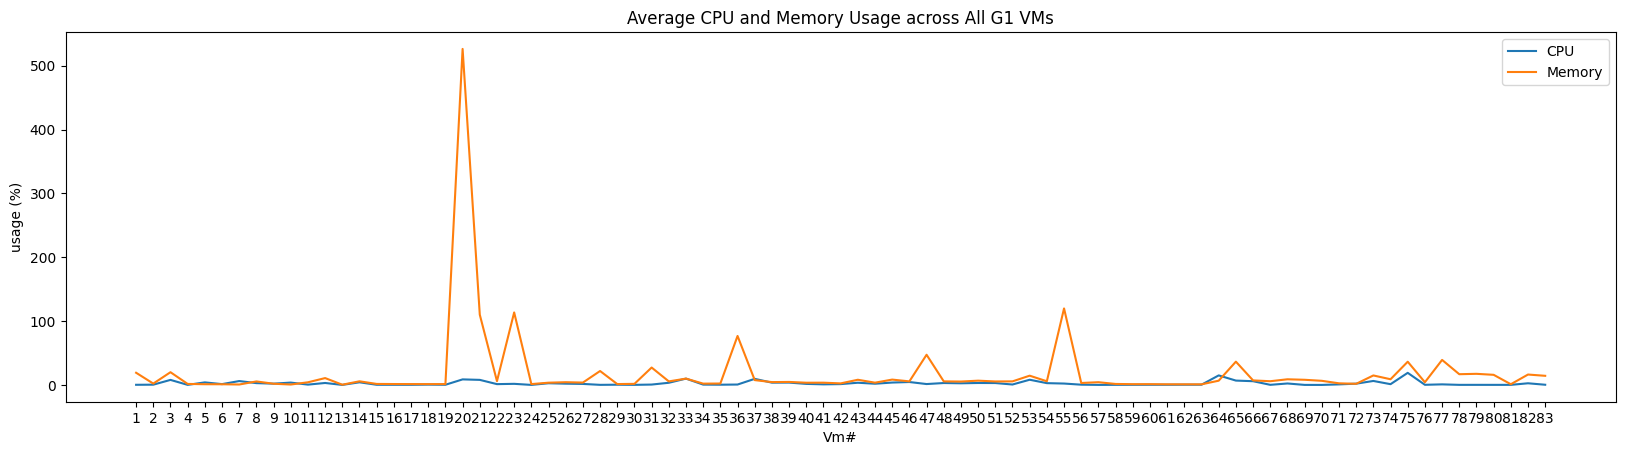

In [ ]:
plt.figure().set_figwidth(20)
plt.plot(avg_cpu_usage_test)
plt.plot(avg_memory_usage_test)
plt.title('Average CPU and Memory Usage across All G1 VMs')
plt.ylabel('usage (%)')
plt.xlabel('Vm#')
plt.legend(['CPU', 'Memory'])
plt.xticks(np.arange(len(avg_memory_usage_test)),np.arange(1, len(avg_memory_usage_test)+1, 1))

plt.show()

In [ ]:
avg_cpu_usage_test = []
avg_memory_usage_test = []
for i in g1_list_10:
    df = read_csv_file_orginal(i)
    avg_cpu_usage_test.append(df['CPU usage [%]'].mean())
    avg_memory_usage_test.append(df['Memory usage [%]'].mean())
    if i == g1_list_10[0]:
        df_all_test = df
    else:
        df_all_test = pd.concat([df_all_test, df], ignore_index=True)



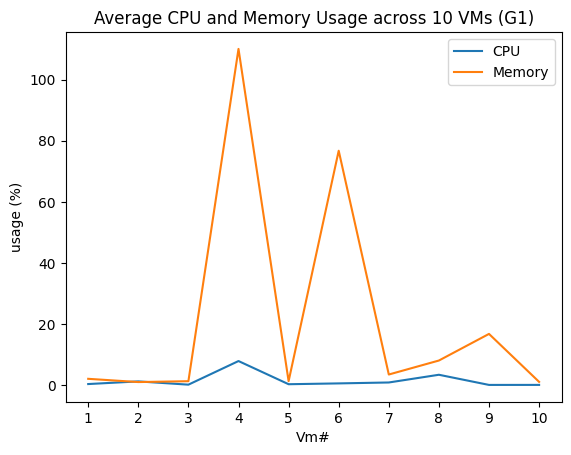

In [ ]:
# plt.figure().set_figwidth(8)
plt.plot(avg_cpu_usage_test)
plt.plot(avg_memory_usage_test)
plt.title('Average CPU and Memory Usage across 10 VMs (G1)')
plt.ylabel('usage (%)')
plt.xlabel('Vm#')
plt.legend(['CPU', 'Memory'])
plt.xticks(np.arange(len(avg_memory_usage_test)),np.arange(1, len(avg_memory_usage_test)+1, 1))

plt.show()

In [ ]:
avg_cpu_usage_test = []
avg_memory_usage_test = []
for i in g2_list:
    df = read_csv_file_orginal(i)
    avg_cpu_usage_test.append(df['CPU usage [%]'].mean())
    avg_memory_usage_test.append(df['Memory usage [%]'].mean())
    if i == g2_list[0]:
        df_all_test = df
    else:
        df_all_test = pd.concat([df_all_test, df], ignore_index=True)




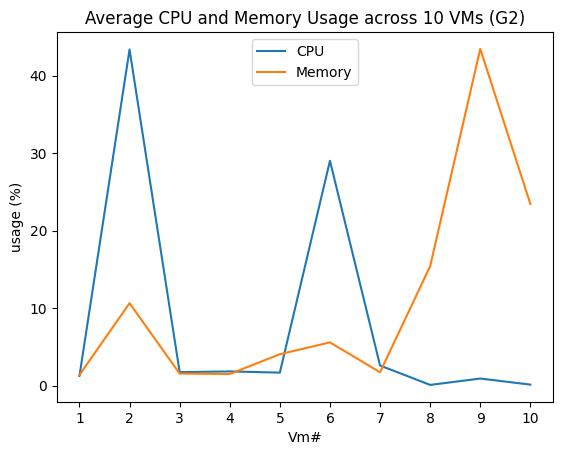

In [ ]:
# plt.figure().set_figwidth(20)
plt.plot(avg_cpu_usage_test)
plt.plot(avg_memory_usage_test)
plt.title('Average CPU and Memory Usage across 10 VMs (G2)')
plt.ylabel('usage (%)')
plt.xlabel('Vm#')
plt.legend(['CPU', 'Memory'])
plt.xticks(np.arange(len(avg_memory_usage_test)),np.arange(1, len(avg_memory_usage_test)+1, 1))

plt.show()

In [57]:
data = read_csv_file_mdata(1)
new_columns = ['CPU_usage', 'Memory_usage', 'Disk_read' , 'Disk_write' , 'Network_received' , 'Network_transmitted']
column_names = [f'{col}{i}' for i in range(0,13) for col in new_columns]
data.columns = column_names
data.head()

,CPU_usage0,Memory_usage0,Disk_read0,Disk_write0,Network_received0,Network_transmitted0,CPU_usage1,Memory_usage1,Disk_read1,Disk_write1,...,Disk_read11,Disk_write11,Network_received11,Network_transmitted11,CPU_usage12,Memory_usage12,Disk_read12,Disk_write12,Network_received12,Network_transmitted12
0,93.233333,9.133331,0.133333,15981.600000,0.000000,2.133333,93.050000,10.066664,1.333333,19137.333333,...,2.533333,10.733333,719.933333,21.466667,0.733333,15.399997,0.0,1.333333,0.0,1.000000
1,93.050000,10.066664,1.333333,19137.333333,0.000000,2.600000,89.150000,13.333330,2.533333,19974.933333,...,0.000000,1.333333,0.000000,1.000000,0.600000,2.199998,0.0,1.333333,0.0,1.000000
2,89.150000,13.333330,2.533333,19974.933333,535.666667,23.933333,90.050000,27.999996,5.466667,8791.800000,...,0.000000,1.333333,0.000000,1.000000,0.650000,0.000000,0.0,1.333333,0.0,1.000000
3,90.050000,27.999996,5.466667,8791.800000,349.666667,5.466667,93.566667,13.866664,5.400000,15679.533333,...,0.000000,1.333333,0.000000,1.000000,0.583333,0.000000,0.0,2.266667,0.0,1.066667
4,93.566667,13.866664,5.400000,15679.533333,0.000000,2.066667,93.250000,9.466664,4.466667,15553.733333,...,0.000000,2.266667,0.000000,1.066667,0.533333,0.000000,0.0,1.333333,0.0,1.000000


In [58]:
train_data.shape

(459291, 78)

In [59]:

features = train_data.iloc[:, 0:-6]  
targets = train_data.iloc[:, 72:74]  

rf6_model = RandomForestRegressor(n_estimators=1000, random_state=42, max_depth=100 , max_features=6 ,min_samples_split=5 ,min_samples_leaf=4)
rf6_model.fit(features, targets)



RandomForestRegressor(max_depth=100, max_features=6, min_samples_leaf=4,
                      min_samples_split=5, n_estimators=1000, random_state=42)

In [68]:
features_test = g1_data_test.iloc[:, 0:-6]  
targets_test  = g1_data_test.iloc[:, 72:74] 

y_pred = rf6_model.predict(features_test)
# print(y_pred.shape)
# print(targets_test.shape)
cpu_pred = y_pred[:, 0]
mem_pred = y_pred[:, 1]

cpu_actual = targets_test.iloc[: , 0]
mem_actual = targets_test.iloc[: , 1]

print ('G1 : RF_6')

print('-'*50)

g1_rf6_cpu_r2 = r2_score(cpu_actual, cpu_pred)
g1_rf6_mem_r2 = r2_score(mem_actual, mem_pred)
print('CPU R2: ', g1_rf6_cpu_r2)
print('Memory R2: ', g1_rf6_mem_r2)

print('-'*50)

g1_rf6_mem_mae = mean_absolute_error(mem_actual, mem_pred)
g1_rf6_cpu_mae = mean_absolute_error(cpu_actual, cpu_pred)
print('CPU MAE: ', g1_rf6_cpu_mae)
print('Memory MAE: ', g1_rf6_mem_mae)

print('-'*50)

g1_rf6_mem_rmse = np.sqrt(mean_squared_error(mem_actual, mem_pred))
g1_rf6_cpu_rmse = np.sqrt(mean_squared_error(cpu_actual, cpu_pred))
print('CPU RMSE: ', g1_rf6_cpu_rmse)
print('Memory RMSE: ', g1_rf6_mem_rmse)


G1 : RF_6
--------------------------------------------------
CPU R2:  0.8541787122512523
Memory R2:  0.029977439794885985
--------------------------------------------------
CPU MAE:  0.9370956512000035
Memory MAE:  2.094317250670951
--------------------------------------------------
CPU RMSE:  2.9426344038620744
Memory RMSE:  40.81907021441867


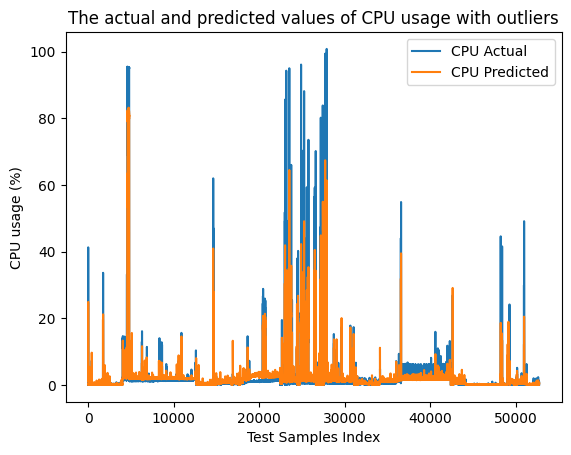

In [69]:
# plot actual and predicted values
plt.plot(cpu_actual, label='CPU Actual')
plt.plot(y_pred[: , 0], label='CPU Predicted')
plt.legend()
plt.title('The actual and predicted values of CPU usage with outliers')
plt.ylabel('CPU usage (%)')
plt.xlabel('Test Samples Index')
plt.show()


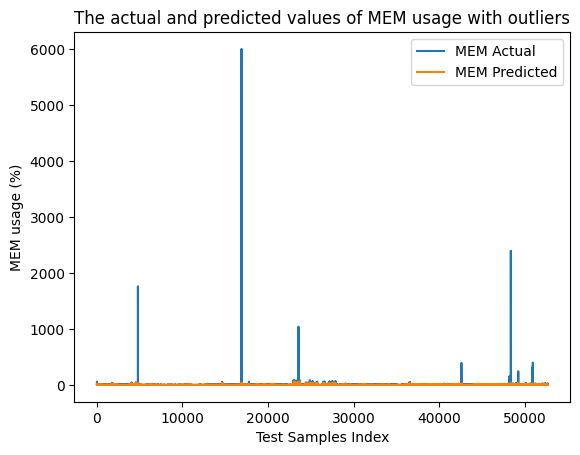

In [70]:
# plot actual and predicted values
plt.plot(mem_actual, label='MEM Actual')
plt.plot(y_pred[: , 1], label='MEM Predicted')
plt.legend()
plt.title('The actual and predicted values of MEM usage with outliers')
plt.ylabel('MEM usage (%)')
plt.xlabel('Test Samples Index')
plt.show()


In [71]:
features_test = g2_data_test.iloc[:, 0:-6]  
targets_test  = g2_data_test.iloc[:, 72:74] 

y_pred = rf6_model.predict(features_test)

cpu_pred = y_pred[:, 0]
mem_pred = y_pred[:, 1]

cpu_actual = targets_test.iloc[: , 0]
mem_actual = targets_test.iloc[: , 1]
print ('G2 : RF_6')

print('-'*50)

g2_rf6_cpu_r2 = r2_score(cpu_actual, cpu_pred)
g2_rf6_mem_r2 = r2_score(mem_actual, mem_pred)
print('CPU R2: ', g2_rf6_cpu_r2)
print('Memory R2: ', g2_rf6_mem_r2)

print('-'*50)

g2_rf6_mem_mae = mean_absolute_error(mem_actual, mem_pred)
g2_rf6_cpu_mae = mean_absolute_error(cpu_actual, cpu_pred)
print('CPU MAE: ', g2_rf6_cpu_mae)
print('Memory MAE: ', g2_rf6_mem_mae)

print('-'*50)

g2_rf6_mem_rmse = np.sqrt(mean_squared_error(mem_actual, mem_pred))
g2_rf6_cpu_rmse = np.sqrt(mean_squared_error(cpu_actual, cpu_pred))
print('CPU RMSE: ', g2_rf6_cpu_rmse)
print('Memory RMSE: ', g2_rf6_mem_rmse)




G2 : RF_6
--------------------------------------------------
CPU R2:  0.9536269228022847
Memory R2:  0.9193870396186757
--------------------------------------------------
CPU MAE:  0.8625369567728776
Memory MAE:  2.573911739862165
--------------------------------------------------
CPU RMSE:  3.7703297498324435
Memory RMSE:  4.165958037063229


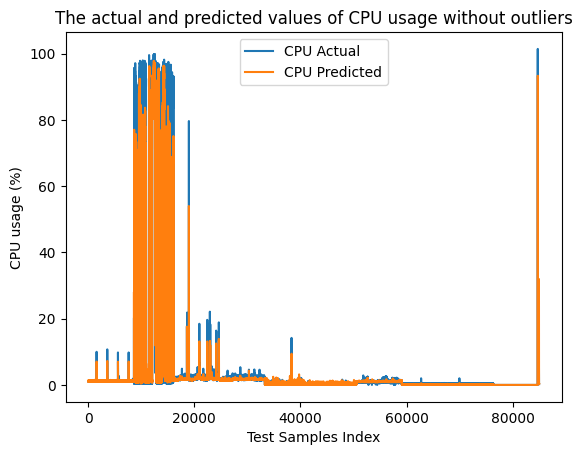

In [72]:
plt.plot(cpu_actual, label='CPU Actual')
plt.plot(y_pred[: , 0], label='CPU Predicted')
plt.legend()
plt.title('The actual and predicted values of CPU usage without outliers')
plt.ylabel('CPU usage (%)')
plt.xlabel('Test Samples Index')
plt.show()


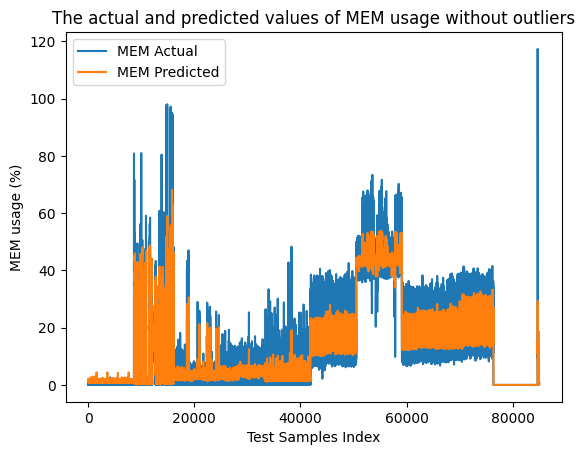

In [73]:
plt.plot(mem_actual, label='MEM Actual')
plt.plot(y_pred[: , 1], label='MEM Predicted')
plt.legend()
plt.title('The actual and predicted values of MEM usage without outliers')
plt.ylabel('MEM usage (%)')
plt.xlabel('Test Samples Index')
plt.show()


In [76]:
def mem_Scaling(MEM_limit_c ,mem_pred):

    alpha = 0.15
    if mem_pred > 80:
        MEM_limit_d = (1 + alpha) * MEM_limit_c
    if mem_pred < 50:
        MEM_limit_d = (alpha + mem_pred) * MEM_limit_c
        
    return MEM_limit_d

In [75]:
def autoScalingAlgorithm(MEM_limit_c , R_c , thr):
    while True:
        metrics = []
        #for 1 hour collect the data every 5 minutes and append to metrics
        
        [cpu_pred , mem_pred] = rf6_model.predict(metrics)

        #ver. Scaling
        MEM_limit_d = mem_Scaling(MEM_limit_c , mem_pred)

        #Horz. Scaling
        R_d = np.ceil(R_c * (cpu_pred/thr))

        return [MEM_limit_d , R_d]


In [153]:
scaler = RobustScaler()
train_data_normalize = pd.DataFrame()
for i in random_list:
    df = read_csv_file_mdata(i).iloc[:-12, :]
    num_columns_in_df = 78
    if len(df.columns) != num_columns_in_df:
        print(f'File {i} has {len(df.columns)} columns')
        continue
    
    new_columns = ['CPU_usage', 'Memory_usage', 'Disk_read' , 'Disk_write' , 'Network_received' , 'Network_transmitted']
    column_names = [f'{col}{i}' for i in range(0,13) for col in new_columns]
    # df.columns = column_names
  
    x  = scaler.fit_transform(df)
    df = pd.DataFrame(x, columns=column_names)
    df = df.astype(float)


    if i == random_list[0]:
        train_data_normalize = df
    else:
        train_data_normalize = pd.concat([train_data_normalize, df], ignore_index=True)

File 312 has 30 columns


In [167]:
train_data_normalize

,CPU_usage0,Memory_usage0,Disk_read0,Disk_write0,Network_received0,Network_transmitted0,CPU_usage1,Memory_usage1,Disk_read1,Disk_write1,...,Disk_read11,Disk_write11,Network_received11,Network_transmitted11,CPU_usage12,Memory_usage12,Disk_read12,Disk_write12,Network_received12,Network_transmitted12
0,-0.166667,-0.499997,0.0,0.50,-0.25,-0.5,-0.333333,0.999964,0.0,0.75,...,0.0,0.50,0.75,0.5,0.000000,-0.500000,0.0,0.50,-0.25,-0.5
1,-0.333333,0.999967,0.0,0.75,0.75,0.5,0.000000,-0.125009,0.0,0.00,...,0.0,0.50,-0.25,-0.5,0.000000,-0.500000,0.0,3.25,0.75,0.5
2,0.000000,-0.125006,0.0,0.00,-0.25,-0.5,-0.333333,-0.500000,0.0,0.50,...,0.0,3.25,0.75,0.5,0.000000,0.249982,0.0,0.00,-0.25,-0.5
3,-0.333333,-0.499997,0.0,0.50,0.75,0.0,0.000000,0.624973,0.0,0.75,...,0.0,0.00,-0.25,-0.5,-0.500000,0.124985,0.0,0.50,0.75,0.5
4,0.000000,0.624976,0.0,0.75,-0.25,-0.5,-0.333333,-0.500000,0.0,18.25,...,0.0,0.50,0.75,0.5,0.166667,1.874979,0.0,0.75,-0.25,-0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407195,0.000000,0.000000,0.0,0.00,0.00,0.0,0.000000,0.000000,0.0,0.00,...,0.0,0.00,0.00,0.0,0.000000,0.000000,0.0,0.00,0.00,0.0
407196,0.000000,0.000000,0.0,0.00,0.00,0.0,0.000000,0.000000,0.0,0.00,...,0.0,0.00,0.00,0.0,0.000000,0.000000,0.0,0.00,0.00,0.0
407197,0.000000,0.000000,0.0,0.00,0.00,0.0,0.000000,0.000000,0.0,0.00,...,0.0,0.00,0.00,0.0,0.000000,0.000000,0.0,0.00,0.00,0.0
407198,0.000000,0.000000,0.0,0.00,0.00,0.0,0.000000,0.000000,0.0,0.00,...,0.0,0.00,0.00,0.0,0.000000,0.000000,0.0,0.00,0.00,0.0


In [166]:
for i in g1_list_10:

    df = read_csv_file_mdata(i).iloc[:-12, :]
    
    num_columns_in_df = 78

    if len(df.columns) != num_columns_in_df:
        continue
    
    new_columns = ['CPU_usage', 'Memory_usage', 'Disk_read' , 'Disk_write' , 'Network_received' , 'Network_transmitted']
    column_names = [f'{col}{i}' for i in range(0,13) for col in new_columns]
    df.columns = column_names
    
    df  = scaler.fit_transform(df)
    df = pd.DataFrame(df, columns=column_names)
    df = df.astype(float)

    if i == g1_list_10[0]:
        g1_data_test_normalize = df
    else:
        g1_data_test_normalize = pd.concat([g1_data_test_normalize, df], ignore_index=True)




In [168]:
for i in g2_list:

    df = read_csv_file_mdata(i).iloc[:-12, :]

    num_columns_in_df = 78

    if len(df.columns) != num_columns_in_df:
        continue
    
    new_columns = ['CPU_usage', 'Memory_usage', 'Disk_read' , 'Disk_write' , 'Network_received' , 'Network_transmitted']
    column_names = [f'{col}{i}' for i in range(0,13) for col in new_columns]
    df.columns = column_names
    
    df  = scaler.fit_transform(df)
    df = pd.DataFrame(df, columns=column_names)
    df = df.astype(float)


    if i == g2_list[0]:
        g2_data_test_normalize = df
    else:
        g2_data_test_normalize = pd.concat([g2_data_test_normalize, df], ignore_index=True)




In [164]:
type(train_data_normalize)

pandas.core.frame.DataFrame

In [165]:
train_data_normalize.shape

(407200, 78)

In [169]:
features_normalized = train_data_normalize.iloc[:, 0:-6]
targets_normalized = train_data_normalize.iloc[:, 72:74]

rf6_model_normalized = RandomForestRegressor(n_estimators=1000, random_state=42, max_depth=100 , max_features=6 ,min_samples_split=5 ,min_samples_leaf=4)
rf6_model_normalized.fit(features_normalized, targets_normalized)


RandomForestRegressor(max_depth=100, max_features=6, min_samples_leaf=4,
                      min_samples_split=5, n_estimators=1000, random_state=42)

In [170]:


features_test = g1_data_test_normalize.iloc[:, 0:-6]  
targets_test  = g1_data_test_normalize.iloc[:, 72:74]  

y_pred = rf6_model_normalized.predict(features_test)
# print(targets_test.shape)
cpu_pred = y_pred[:, 0]
mem_pred = y_pred[:, 1]

cpu_actual = targets_test.iloc[:, 0]
mem_actual = targets_test.iloc[:, 1]


print ('G1 : RF_6_norm')

print('-'*50)

g1_rf6_norm_cpu_r2 = r2_score(cpu_actual, cpu_pred)
g1_rf6_norm_mem_r2 = r2_score(mem_actual, mem_pred)
print('CPU R2: ', g1_rf6_norm_cpu_r2)
print('Memory R2: ', g1_rf6_norm_mem_r2)

print('-'*50)

g1_rf6_norm_mem_mae = mean_absolute_error(mem_actual, mem_pred)
g1_rf6_norm_cpu_mae = mean_absolute_error(cpu_actual, cpu_pred)
print('CPU MAE: ', g1_rf6_norm_cpu_mae)
print('Memory MAE: ', g1_rf6_norm_mem_mae)

print('-'*50)

g1_rf6_norm_mem_rmse = np.sqrt(mean_squared_error(mem_actual, mem_pred))
g1_rf6_norm_cpu_rmse = np.sqrt(mean_squared_error(cpu_actual, cpu_pred))
print('CPU RMSE: ', g1_rf6_norm_cpu_rmse)
print('Memory RMSE: ', g1_rf6_norm_mem_rmse)


G1 : RF_6_norm
--------------------------------------------------
CPU R2:  0.2549594166849306
Memory R2:  0.02077720721856502
--------------------------------------------------
CPU MAE:  0.7809994658017785
Memory MAE:  0.7118472025977166
--------------------------------------------------
CPU RMSE:  5.520895268966804
Memory RMSE:  16.159622986631476


In [173]:
features_test = g2_data_test_normalize.iloc[:, 0:-6] 
targets_test  = g2_data_test_normalize.iloc[:, 72:74]  

y_pred = rf6_model_normalized.predict(features_test)
# print(y_pred.shape)
# print(targets_test.shape)
cpu_pred = y_pred[:, 0]
mem_pred = y_pred[:, 1]

cpu_actual = targets_test.iloc[:, 0]
mem_actual = targets_test.iloc[:, 1]


print ('G2 : RF_6_norm')

print('-'*50)

g2_rf6_norm_cpu_r2 = r2_score(cpu_actual, cpu_pred)
g2_rf6_norm_mem_r2 = r2_score(mem_actual, mem_pred)
print('CPU R2: ', g2_rf6_norm_cpu_r2)
print('Memory R2: ', g2_rf6_norm_mem_r2)

print('-'*50)

g2_rf6_norm_mem_mae = mean_absolute_error(mem_actual, mem_pred)
g2_rf6_norm_cpu_mae = mean_absolute_error(cpu_actual, cpu_pred)
print('CPU MAE: ', g2_rf6_norm_cpu_mae)
print('Memory MAE: ', g2_rf6_norm_mem_mae)

print('-'*50)

g2_rf6_norm_mem_rmse = np.sqrt(mean_squared_error(mem_actual, mem_pred))
g2_rf6_norm_cpu_rmse = np.sqrt(mean_squared_error(cpu_actual, cpu_pred))
print('CPU RMSE: ', g2_rf6_norm_cpu_rmse)
print('Memory RMSE: ', g2_rf6_norm_mem_rmse)



G2 : RF_6_norm
--------------------------------------------------
CPU R2:  0.3052862639783327
Memory R2:  0.5367286324443266
--------------------------------------------------
CPU MAE:  0.3424418319510392
Memory MAE:  0.4378001340056756
--------------------------------------------------
CPU RMSE:  0.9333207956971447
Memory RMSE:  0.6568181441067326


In [77]:
train_data_4.iloc[:, 48:50]

,CPU_usage12,Memory_usage12
0,0.0,0.000000
1,0.0,0.000000
2,0.0,0.000000
3,0.0,0.000000
4,0.0,0.000000
...,...,...
457941,0.4,16.924245
457942,0.0,27.131155
457943,0.0,11.626596
457944,0.4,13.952979


In [40]:
features = train_data_4.iloc[:, 0:-4]  
targets = train_data_4.iloc[:, 48:50] 

rf4_model = RandomForestRegressor(n_estimators=1000, random_state=42, max_depth=100 , max_features=4 ,min_samples_split=5 ,min_samples_leaf=4)
rf4_model.fit(features, targets)



RandomForestRegressor(max_depth=100, max_features=4, min_samples_leaf=4,
                      min_samples_split=5, n_estimators=1000, random_state=42)

In [41]:
features_test = g1_data_test_4.iloc[:, 0:-4]  
targets_test  = g1_data_test_4.iloc[:, 48:50] 

y_pred = rf4_model.predict(features_test)
# print(y_pred.shape)
# print(targets_test.shape)
cpu_pred = y_pred[:, 0]
mem_pred = y_pred[:, 1]

cpu_actual = targets_test.iloc[: , 0]
mem_actual = targets_test.iloc[: , 1]


print ('G1 : RF_4')

print('-'*50)

g1_rf4_cpu_r2 = r2_score(cpu_actual, cpu_pred)
g1_rf4_mem_r2 = r2_score(mem_actual, mem_pred)
print('CPU R2: ', g1_rf4_cpu_r2)
print('Memory R2: ', g1_rf4_mem_r2)

print('-'*50)

g1_rf4_mem_mae = mean_absolute_error(mem_actual, mem_pred)
g1_rf4_cpu_mae = mean_absolute_error(cpu_actual, cpu_pred)
print('CPU MAE: ', g1_rf4_cpu_mae)
print('Memory MAE: ', g1_rf4_mem_mae)

print('-'*50)

g1_rf4_mem_rmse = np.sqrt(mean_squared_error(mem_actual, mem_pred))
g1_rf4_cpu_rmse = np.sqrt(mean_squared_error(cpu_actual, cpu_pred))
print('CPU RMSE: ', g1_rf4_cpu_rmse)
print('Memory RMSE: ', g1_rf4_mem_rmse)


G1 : RF_4
--------------------------------------------------
CPU R2:  0.8564760208870243
Memory R2:  0.03194562422763514
--------------------------------------------------
CPU MAE:  0.8947414304444995
Memory MAE:  2.0522494297904847
--------------------------------------------------
CPU RMSE:  2.9193628478866134
Memory RMSE:  40.777638058292375


In [42]:
features_test = g2_data_test_4.iloc[:, 0:-4]  
targets_test  = g2_data_test_4.iloc[:, 48:50] 

y_pred = rf4_model.predict(features_test)


cpu_pred = y_pred[:, 0]
mem_pred = y_pred[:, 1]

cpu_actual = targets_test.iloc[: , 0]
mem_actual = targets_test.iloc[: , 1]



print ('G2 : RF_4')

print('-'*50)

g2_rf4_cpu_r2 = r2_score(cpu_actual, cpu_pred)
g2_rf4_mem_r2 = r2_score(mem_actual, mem_pred)
print('CPU R2: ', g2_rf4_cpu_r2)
print('Memory R2: ', g2_rf4_mem_r2)

print('-'*50)

g2_rf4_mem_mae = mean_absolute_error(mem_actual, mem_pred)
g2_rf4_cpu_mae = mean_absolute_error(cpu_actual, cpu_pred)
print('CPU MAE: ', g2_rf4_cpu_mae)
print('Memory MAE: ', g2_rf4_mem_mae)

print('-'*50)

g2_rf4_mem_rmse = np.sqrt(mean_squared_error(mem_actual, mem_pred))
g2_rf4_cpu_rmse = np.sqrt(mean_squared_error(cpu_actual, cpu_pred))
print('CPU RMSE: ', g2_rf4_cpu_rmse)
print('Memory RMSE: ', g2_rf4_mem_rmse)




G2 : RF_4
--------------------------------------------------
CPU R2:  0.9552699270350139
Memory R2:  0.9178418252963576
--------------------------------------------------
CPU MAE:  0.7935413900026155
Memory MAE:  2.6315529573919605
--------------------------------------------------
CPU RMSE:  3.702935782493564
Memory RMSE:  4.205695705291733


In [43]:
scaler = RobustScaler()

for i in random_list:

    df = read_csv_file_mdata_4(i).iloc[:-12, :]
    num_columns_in_df = 52

    if len(df.columns) != num_columns_in_df:
        print(f'File {i} has {len(df.columns)} columns')
        continue
    
    new_columns = ['CPU_usage', 'Memory_usage', 'Network_received' , 'Network_transmitted']
    column_names = [f'{col}{i}' for i in range(0,13) for col in new_columns]
    # df.columns = column_names
  
    x  = scaler.fit_transform(df)
    df = pd.DataFrame(x, columns=column_names)
    df = df.astype(float)


    if i == random_list[0]:
        train_data_4_normalize = df
    else:
        train_data_4_normalize = pd.concat([train_data_4_normalize, df], ignore_index=True)

In [44]:
for i in g1_list_10:

    df = read_csv_file_mdata_4(i).iloc[:-12, :]

    num_columns_in_df = 52

    if len(df.columns) != num_columns_in_df:
        continue
    
    new_columns = ['CPU_usage', 'Memory_usage', 'Network_received' , 'Network_transmitted']
    column_names = [f'{col}{i}' for i in range(0,13) for col in new_columns]
    df.columns = column_names
    
    df  = scaler.fit_transform(df)
    df = pd.DataFrame(df, columns=column_names)
    df = df.astype(float)

    if i == g1_list_10[0]:
        g1_data_test_4_normalize = df
    else:
        g1_data_test_4_normalize = pd.concat([g1_data_test_4_normalize, df], ignore_index=True)




In [45]:
for i in g2_list:

    df = read_csv_file_mdata_4(i).iloc[:-12, :]

    num_columns_in_df = 52

    if len(df.columns) != num_columns_in_df:
        continue
    
    new_columns = ['CPU_usage', 'Memory_usage', 'Network_received' , 'Network_transmitted']
    column_names = [f'{col}{i}' for i in range(0,13) for col in new_columns]
    df.columns = column_names
    
    df  = scaler.fit_transform(df)
    df = pd.DataFrame(df, columns=column_names)
    df = df.astype(float)


    if i == g2_list[0]:
        g2_data_test_4_normalize = df
    else:
        g2_data_test_4_normalize = pd.concat([g2_data_test_4_normalize, df], ignore_index=True)




In [47]:
features_normalized = train_data_4_normalize.iloc[:, 0:-4]
targets_normalized = train_data_4_normalize.iloc[:, 48:50]

rf4_model_normalized = RandomForestRegressor(n_estimators=1000, random_state=42, max_depth=100 , max_features=4 ,min_samples_split=5 ,min_samples_leaf=4)
rf4_model_normalized.fit(features_normalized, targets_normalized)


RandomForestRegressor(max_depth=100, max_features=4, min_samples_leaf=4,
                      min_samples_split=5, n_estimators=1000, random_state=42)

In [48]:

features_test = g1_data_test_4_normalize.iloc[:, 0:-4]  
targets_test  = g1_data_test_4_normalize.iloc[:, 48:50]  

y_pred = rf4_model_normalized.predict(features_test)
# print(y_pred.shape)
# print(targets_test.shape)
cpu_pred = y_pred[:, 0]
mem_pred = y_pred[:, 1]

cpu_actual = targets_test.iloc[:, 0]
mem_actual = targets_test.iloc[:, 1]


print ('G1 : RF_4_norm')

print('-'*50)

g1_rf4_norm_cpu_r2 = r2_score(cpu_actual, cpu_pred)
g1_rf4_norm_mem_r2 = r2_score(mem_actual, mem_pred)
print('CPU R2: ', g1_rf4_norm_cpu_r2)
print('Memory R2: ', g1_rf4_norm_mem_r2)

print('-'*50)

g1_rf4_norm_mem_mae = mean_absolute_error(mem_actual, mem_pred)
g1_rf4_norm_cpu_mae = mean_absolute_error(cpu_actual, cpu_pred)
print('CPU MAE: ', g1_rf4_norm_cpu_mae)
print('Memory MAE: ', g1_rf4_norm_mem_mae)

print('-'*50)

g1_rf4_norm_mem_rmse = np.sqrt(mean_squared_error(mem_actual, mem_pred))
g1_rf4_norm_cpu_rmse = np.sqrt(mean_squared_error(cpu_actual, cpu_pred))
print('CPU RMSE: ', g1_rf4_norm_cpu_rmse)
print('Memory RMSE: ', g1_rf4_norm_mem_rmse)


G1 : RF_4_norm
--------------------------------------------------
CPU R2:  0.287510919044216
Memory R2:  0.045460264791005955
--------------------------------------------------
CPU MAE:  4.173000050215813
Memory MAE:  1.2283520928794223
--------------------------------------------------
CPU RMSE:  33.98916119426536
Memory RMSE:  23.495150063085052


In [49]:
features_test = g2_data_test_4_normalize.iloc[:, 0:-4]  
targets_test  = g2_data_test_4_normalize.iloc[:, 48:50]  

y_pred = rf4_model_normalized.predict(features_test)

cpu_pred = y_pred[:, 0]
mem_pred = y_pred[:, 1]

cpu_actual = targets_test.iloc[:, 0]
mem_actual = targets_test.iloc[:, 1]


print ('G2 : RF_4_norm')

print('-'*50)

g2_rf4_norm_cpu_r2 = r2_score(cpu_actual, cpu_pred)
g2_rf4_norm_mem_r2 = r2_score(mem_actual, mem_pred)
print('CPU R2: ', g2_rf4_norm_cpu_r2)
print('Memory R2: ', g2_rf4_norm_mem_r2)

print('-'*50)

g2_rf4_norm_mem_mae = mean_absolute_error(mem_actual, mem_pred)
g2_rf4_norm_cpu_mae = mean_absolute_error(cpu_actual, cpu_pred)
print('CPU MAE: ', g2_rf4_norm_cpu_mae)
print('Memory MAE: ', g2_rf4_norm_mem_mae)

print('-'*50)

g2_rf4_norm_mem_rmse = np.sqrt(mean_squared_error(mem_actual, mem_pred))
g2_rf4_norm_cpu_rmse = np.sqrt(mean_squared_error(cpu_actual, cpu_pred))
print('CPU RMSE: ', g2_rf4_norm_cpu_rmse)
print('Memory RMSE: ', g2_rf4_norm_mem_rmse)


G2 : RF_4_norm
--------------------------------------------------
CPU R2:  0.528120082229351
Memory R2:  0.28906258571213816
--------------------------------------------------
CPU MAE:  0.2881550902724856
Memory MAE:  0.4978901602238261
--------------------------------------------------
CPU RMSE:  2.0431122135784574
Memory RMSE:  0.9661143865600295


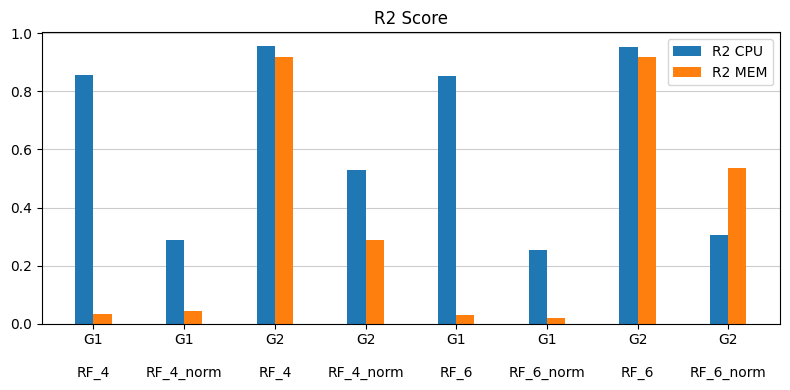

In [4]:
labels = ['G1\n\nRF_4', 'G1\n\nRF_4_norm', 'G2\n\nRF_4', 'G2\n\nRF_4_norm', 'G1\n\nRF_6', 'G1\n\nRF_6_norm', 'G2\n\nRF_6', 'G2\n\nRF_6_norm']
cpu_r2 = [g1_rf4_cpu_r2 , g1_rf4_norm_cpu_r2 , g2_rf4_cpu_r2 , g2_rf4_norm_cpu_r2 , g1_rf6_cpu_r2 , g1_rf6_norm_cpu_r2 , g2_rf6_cpu_r2 , g2_rf6_norm_cpu_r2]
mem_r2 = [g1_rf4_mem_r2 , g1_rf4_norm_mem_r2 , g2_rf4_mem_r2 , g2_rf4_norm_mem_r2 , g1_rf6_mem_r2 , g1_rf6_norm_mem_r2 , g2_rf6_mem_r2 , g2_rf6_norm_mem_r2]

x = np.arange(len(labels))  
width = 0.20  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, cpu_r2, width, label='R2 CPU')
rects2 = ax.bar(x + width/2, mem_r2, width, label='R2 MEM')

ax.set_title('R2 Score')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.set_size_inches(8, 4)

ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#CCC')
ax.xaxis.grid(False)

ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)


fig.tight_layout()

plt.show()

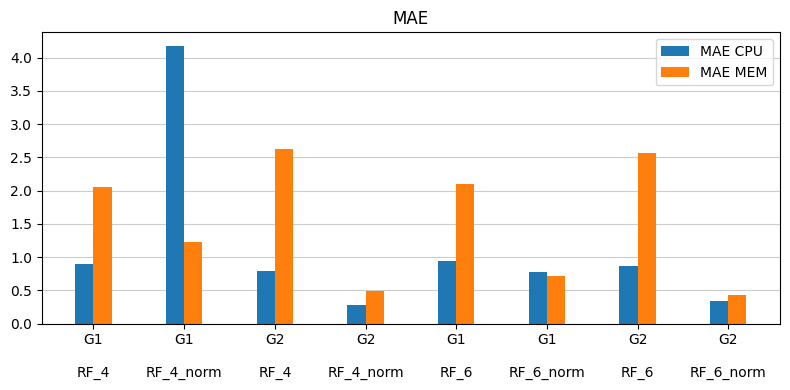

In [5]:
labels = ['G1\n\nRF_4', 'G1\n\nRF_4_norm', 'G2\n\nRF_4', 'G2\n\nRF_4_norm', 'G1\n\nRF_6', 'G1\n\nRF_6_norm', 'G2\n\nRF_6', 'G2\n\nRF_6_norm']
cpu_mae = [g1_rf4_cpu_mae , g1_rf4_norm_cpu_mae, g2_rf4_cpu_mae, g2_rf4_norm_cpu_mae, g1_rf6_cpu_mae, g1_rf6_norm_cpu_mae, g2_rf6_cpu_mae, g2_rf6_norm_cpu_mae]
mem_mae = [g1_rf4_mem_mae , g1_rf4_norm_mem_mae, g2_rf4_mem_mae, g2_rf4_norm_mem_mae, g1_rf6_mem_mae, g1_rf6_norm_mem_mae, g2_rf6_mem_mae, g2_rf6_norm_mem_mae]

x = np.arange(len(labels)) 
width = 0.20 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, cpu_mae, width, label='MAE CPU')
rects2 = ax.bar(x + width/2, mem_mae, width, label='MAE MEM')

ax.set_title('MAE')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.set_size_inches(8, 4)

ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#CCC')
ax.xaxis.grid(False)

ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)

fig.tight_layout()

plt.show()

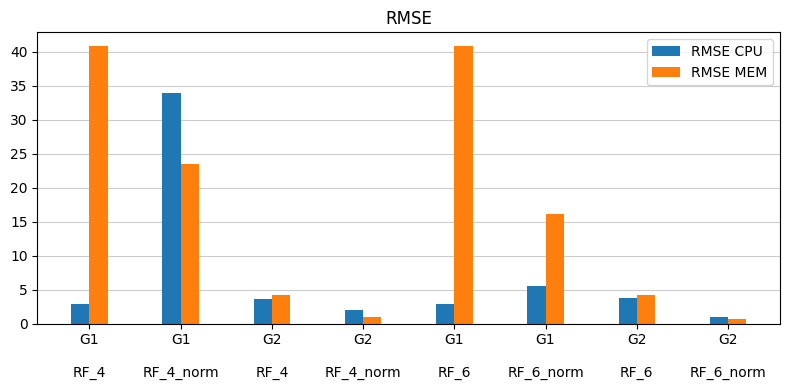

In [6]:
labels = ['G1\n\nRF_4', 'G1\n\nRF_4_norm', 'G2\n\nRF_4', 'G2\n\nRF_4_norm', 'G1\n\nRF_6', 'G1\n\nRF_6_norm', 'G2\n\nRF_6', 'G2\n\nRF_6_norm']
cpu_rmse = [g1_rf4_cpu_rmse , g1_rf4_norm_cpu_rmse, g2_rf4_cpu_rmse, g2_rf4_norm_cpu_rmse, g1_rf6_cpu_rmse, g1_rf6_norm_cpu_rmse, g2_rf6_cpu_rmse, g2_rf6_norm_cpu_rmse]
mem_rmse = [g1_rf4_mem_rmse , g1_rf4_norm_mem_rmse, g2_rf4_mem_rmse, g2_rf4_norm_mem_rmse, g1_rf6_mem_rmse, g1_rf6_norm_mem_rmse, g2_rf6_mem_rmse, g2_rf6_norm_mem_rmse]

x = np.arange(len(labels))  
width = 0.20  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, cpu_rmse, width, label='RMSE CPU')
rects2 = ax.bar(x + width/2, mem_rmse, width, label='RMSE MEM')

ax.set_title('RMSE')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.set_size_inches(8, 4)

ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#CCC')
ax.xaxis.grid(False)

ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)


fig.tight_layout()

plt.show()